In [1]:
import pandas as pd
from numpy import loadtxt
from xgboost import XGBClassifier,XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score
#!pip3 install catboost


In [2]:
train = pd.read_csv("train.csv")
pd.get_dummies(train['F10'], prefix='race')
train= pd.concat([train,pd.get_dummies(train['F10'],prefix='race')],axis=1)
train= pd.concat([train,pd.get_dummies(train['F11'],prefix='gender')],axis=1)
train.drop(['id','F10','F11'],axis=1, inplace=True)

train.columns


Index(['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'credit',
       'race_ Amer-Indian-Eskimo', 'race_ Asian-Pac-Islander', 'race_ Black',
       'race_ Other', 'race_ White', 'gender_ Female', 'gender_ Male'],
      dtype='object')

In [82]:

X = (train[['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9']])
Y=train[['credit']]
type(X)
type(Y)


pandas.core.frame.DataFrame

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=4,shuffle=False)


In [84]:
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier,ExtraTreesClassifier,AdaBoostClassifier, GradientBoostingRegressor,RandomForestRegressor,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

#model= GradientBoostingClassifier(learning_rate=1.0,max_depth=3,max_features=0.4,min_samples_leaf=13,min_samples_split=5,n_estimators=100,subsample=0.8)
model= GradientBoostingClassifier(learning_rate=0.5,max_depth=5,max_features=0.3,min_samples_leaf=25,min_samples_split=4,n_estimators=100,subsample=1.0)




#model=GradientBoostingClassifier(learning_rate=0.5, max_depth=5, max_features=0.3, min_samples_leaf=13, min_samples_split=4, n_estimators=100, subsample=1.0,tol= 0.0000001,validation_fraction=0.0848061910893144)
#model= XGBClassifier(learning_rate=0.5, max_depth=10, min_child_weight=6, n_estimators=100, nthread=1, subsample=0.9500000000000001)





In [85]:
model.fit(X_train, y_train)
print(model.feature_importances_)




/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0.14761846 0.0449867  0.11179232 0.07446073 0.22994721 0.06615535
 0.27049077 0.0131459  0.04140255]


In [86]:

y_pred = model.predict(X_test)
y_pred=[round(i) for i in y_pred]
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
f1_metric = f1_score(y_test, y_pred)
print(f1_metric)

Accuracy: 86.51%
0.7013057671381936


In [87]:
#print(type(y_test))
#print((y_test["credit"].to_list()))
#print(list(y_pred))
y_test=y_test["credit"].to_list()
from nltk import ConfusionMatrix
print(ConfusionMatrix(y_test, list(y_pred)))

  |    0    1 |
--+-----------+
0 |<5754> 399 |
1 |  699<1289>|
--+-----------+
(row = reference; col = test)



[[5754  399]
 [ 699 1289]]


Text(0.5, 15.0, 'Predicted label')

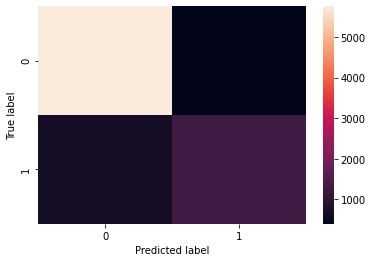

In [88]:
from sklearn.metrics import confusion_matrix
c=confusion_matrix(y_test, list(y_pred))
print(c)
import seaborn as sn
import matplotlib.pyplot as plt
sn.heatmap(c)
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [89]:
from sklearn.metrics import roc_auc_score,roc_curve,auc
fpr, tpr, thresholds = roc_curve(y_test, list(y_pred))
print(auc(fpr,tpr))

0.7917719628350307


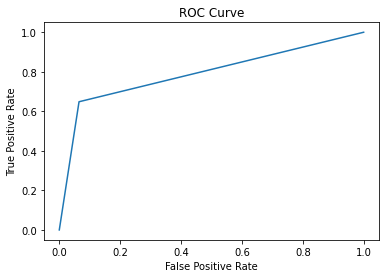

In [90]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr)

plt.title("ROC Curve")

plt.xlabel("False Positive Rate")

plt.ylabel("True Positive Rate")

plt.show()